In [21]:
import numpy as np
import pandas as pd
from scipy.integrate import odeint
import matplotlib.pyplot as plt
from scipy.stats import chi2

def calculate_variance_and_error(data):
    N = len(data)  # Number of observations
    mean = np.mean(data)  # Sample mean
    variance = np.var(data, ddof=1)  # Sample variance with N-1 degrees of freedom
    
    # Calculate the chi-squared quantiles for a 95% confidence interval
    alpha = 0.05  # Significance level for a 95% CI
    chi2_lower = chi2.ppf(alpha / 2, N - 1)
    chi2_upper = chi2.ppf(1 - alpha / 2, N - 1)
    
    # Calculate the lower and upper bounds of the variance
    variance_lower_bound = (N - 1) * variance / chi2_upper
    variance_upper_bound = (N - 1) * variance / chi2_lower
    
    # Calculate the "error bars" as the distance from the sample variance to the bounds
    error_lower = variance - variance_lower_bound
    error_upper = variance_upper_bound - variance
    
    return variance, (error_lower, error_upper)


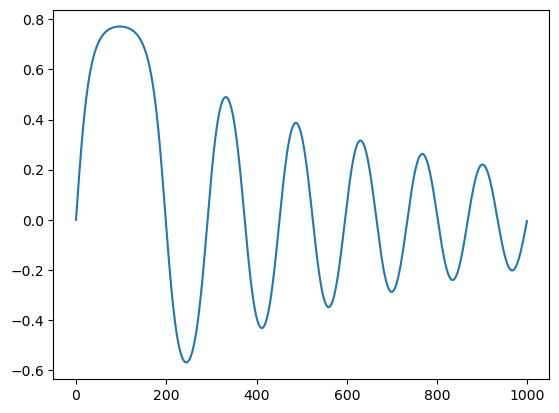

In [3]:
### Non-linear pendulum
ds_name = 'Non-linear pendulum'

# Time discretization
Nt = 1000
# Create grid of time steps
tspan = np.linspace(0, 25, Nt)
# Damping parameter
lmbda = 0.1
# Define pendulum equation
w = 4

def dtheta(theta, t):
    return [theta[1], -np.sin(w * theta[0]) - lmbda * theta[1]]

# Specific initial condition
theta_ic = [0, 1.05]  
# theta_ic = [0.8, 0]  

# Solve the ODE
theta = odeint(dtheta, theta_ic, tspan)

# Extract the time-series
X = theta[:, 0]
Y = theta[:, 1]

# Store the generated time-series in a pandas DataFrame
df = pd.DataFrame({'Time': tspan, 'X': X})

train = df['X'][0:int(Nt/3*2)]
test = df['X'][int(Nt/3*2):]

plt.plot(df['X'])

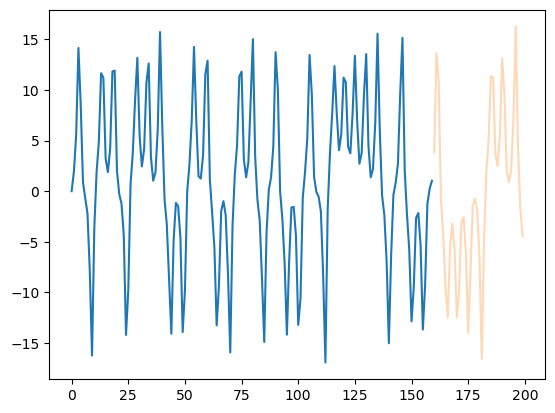

In [4]:
# Lorenz system parameters (for chaotic regime)
# Time discretization
Nt = 200
# Create grid of time steps
tspan = np.linspace(0, 30, Nt)

sigma = 10.0
rho = 28.0
beta = 8.0 / 3.0

def lorenz(state, t):
    x, y, z = state
    dxdt = sigma * (y - x)
    dydt = x * (rho - z) - y
    dzdt = x * y - beta * z
    return [dxdt, dydt, dzdt]

# Specific initial condition
initial_state = [0, 2.01, 23.02] 

# Solve the ODE
solution = odeint(lorenz, initial_state, tspan)

# Extract the time-series
X = solution[:, 0]
Y = solution[:, 1]
Z = solution[:, 2]

# Store the generated time-series in a pandas DataFrame
df = pd.DataFrame({'Time': tspan, 'X': X, 'Y': Y, 'Z': Z})

train = df['X'][0:int(Nt/5*4)]
test = df['X'][int(Nt/5*4):]

plt.plot(train, alpha = 1)
plt.plot([np.nan]*len(train)+list(test), alpha = 0.3)
plt.show()

# plt.plot(df['Y'])
# plt.plot(df['Z'])

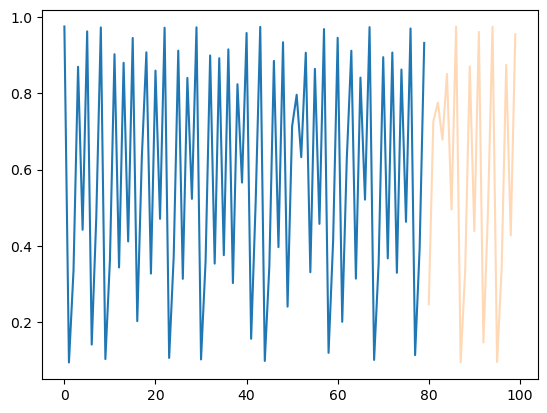

In [5]:
### Logistic Map
def logistic_map(r, x):
    return r * x * (1 - x)

# Parameters
r = 3.9  # Control parameter
x = 0.5  # Initial condition
Nt = 100  # Number of iterations

time_series = []
for i in range(Nt):
    x = logistic_map(r, x)
    time_series.append(x)
    
df = pd.DataFrame({'X': time_series})
train = df['X'][0:int(Nt/5*4)]
test = df['X'][int(Nt/5*4):]

plt.plot(train, alpha = 1)
plt.plot([np.nan]*len(train)+list(test), alpha = 0.3)
plt.show()

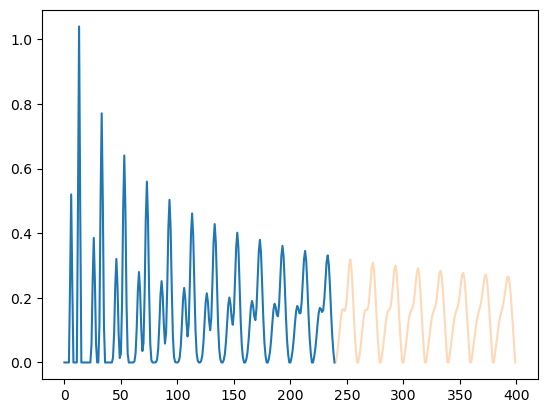

In [6]:
# Parameters
D = 6  # Diffusion coefficient
dx = 0.5  # Space step
L = 10  # Length of the 1D space

dt = 0.01  # Time step
T = 0.2  # Total time
Nx = int(L/dx)  # Number of spatial points
Nt = int(T/dt)  # Number of time steps

# Initialize concentration (u)
u = np.zeros(Nx)
# Initial condition:
u[Nx//3] = 1  # a single spike of concentration 1
u[Nx*2//3] = 2  # a single spike of concentration 2

# Time series container
time_series = []

# Time-stepping loop
for n in range(0, Nt):
    u_new = np.copy(u)
    for i in range(1, Nx-1):
        u_new[i] = u[i] + D * dt / dx**2 * (u[i+1] - 2*u[i] + u[i-1])
    
    # Fix boundary conditions at u = 0
    u_new[0] = 0
    u_new[-1] = 0
    
    u = u_new 
    # Concatenate to form a single time series
    time_series.extend(u)

# Store the time series in a Pandas DataFrame

df = pd.DataFrame({'X': time_series})
train = df['X'][0:int(Nt//3*2*Nx)]
test = df['X'][int(Nt//3*2*Nx):]

# plt.figure(figsize=(10, 5))
plt.plot(train, alpha = 1)
plt.plot([np.nan]*len(train)+list(test), alpha = 0.3)


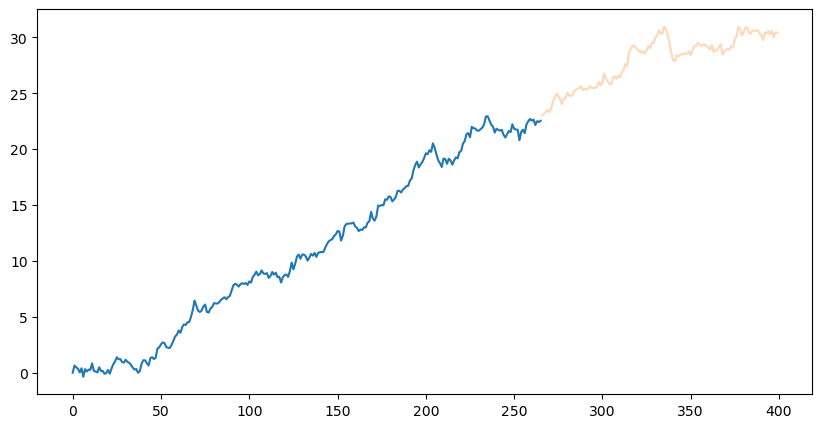

In [23]:
### Drift-Diffusion SDE

# Time discretization
Nt = 400 # number of steps
dt =  0.2 # time step
tspan = np.linspace(0, Nt*dt, Nt)

# Drift and diffusion parameters
a = 0.3  # Drift rate
sigma = 0.8  # Noise level

# Initialize the time series
X = np.zeros(Nt)
X[0] = 0  # Starting point
delta_x = []

np.random.seed(1)
# Generate the drift-diffusion time series
for t in range(1, Nt):
    dW = np.sqrt(dt) * np.random.normal()  # Wiener process (Brownian motion)
    dx = a * dt + sigma * dW
    delta_x += [dx]
    X[t] = X[t-1] + dx

# Store the generated time-series in a pandas DataFrame
df = pd.DataFrame({'Time': tspan, 'X': X})

# Split the data into training and testing sets
train = df['X'][0:int(Nt/3*2)]
test = df['X'][int(Nt/3*2):]

plt.figure(figsize=(10, 5))
plt.plot(train, alpha = 1)
plt.plot([np.nan]*len(train)+list(test), alpha = 0.3)



Mean: 0.07629525334351865, Standard Error: 0.017409440985062145
Variance: 0.12123621569417932, lower error: 0.015226661916508885 upper error 0.018778675147809384


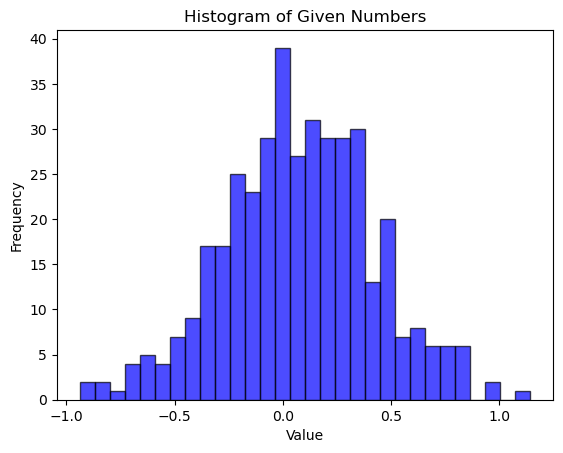

In [25]:
mean_value = np.mean(delta_x)
variance_value = np.var(delta_x)
N = len(delta_x)
std_dev = np.std(delta_x)

# Calculate the standard error for the mean
SE_mean = std_dev / np.sqrt(N)

# Calculate the standard error for the variance
variance, (error_lower, error_upper) = calculate_variance_and_error(delta_x)

# Print mean, variance, and their standard errors
print(f"Mean: {mean_value}, Standard Error: {SE_mean}")
print(f"Variance: {variance}, lower error: {error_lower} upper error {error_upper}")

# Plot histogram
plt.hist(delta_x, bins=30, alpha=0.7, color='blue', edgecolor='black')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Histogram of Given Numbers')

# Show the plot
plt.show()